# ML_fake_news

Notebook para el entrenamiento de los modelos de ML para detección de noticias falsas

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
import joblib
import os

In [ ]:
os.makedirs("/kaggle/working/ml_fake_news", exist_ok=True)

In [2]:
#df_fake=pd.read_csv('/kaggle/input/fake-news-detection/fake.csv').reset_index(drop=True)
#df_fake['label'] = 0
#df_true=pd.read_csv('/kaggle/input/fake-news-detection/true.csv').reset_index(drop=True)
#df_true['label'] = 1

#df = pd.concat([df_fake,df_true], ignore_index=True)
df=pd.read_csv('../input/fake-or-real-news/fake_or_real_news.csv',index_col=[0]).reset_index(drop=True)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Número total de instancias
num_instancias = len(df)

# Conteo de patrones por clase
conteo_clases = df['label'].value_counts()

# Proporción (frecuencia relativa) por clase
proporcion_clases = df['label'].value_counts(normalize=True)

# Mostrar resultados
print("Número total de instancias:", num_instancias)
print("\nConteo por clase:\n", conteo_clases)
print("\nProporción por clase:\n", proporcion_clases)


Número total de instancias: 6335

Conteo por clase:
 label
REAL    3171
FAKE    3164
Name: count, dtype: int64

Proporción por clase:
 label
REAL    0.500552
FAKE    0.499448
Name: proportion, dtype: float64


In [4]:
df['all_text']=df['title']+"\n"+df['text']

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df.head()
#df.drop(['title','text', 'subject', 'date'], axis = 1, inplace=True)

#df = df.sample(frac = 0.5)

,title,text,label,all_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear\nDaniel Greenfiel...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy\nU...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...


In [5]:
x_train,x_test,y_train,y_test=train_test_split(df['all_text'],df['label'],test_size=0.2,stratify=df['label'])

# SVM


In [16]:
svm_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("svc", SVC(C=3.4386301969217765, 
                kernel='rbf', 
                gamma= 'scale'))
])


svm_pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc', SVC(C=3.4386301969217765))])

In [18]:
y_pred = svm_pipeline.predict(x_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        FAKE       0.91      0.94      0.93       633
        REAL       0.94      0.91      0.92       634

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



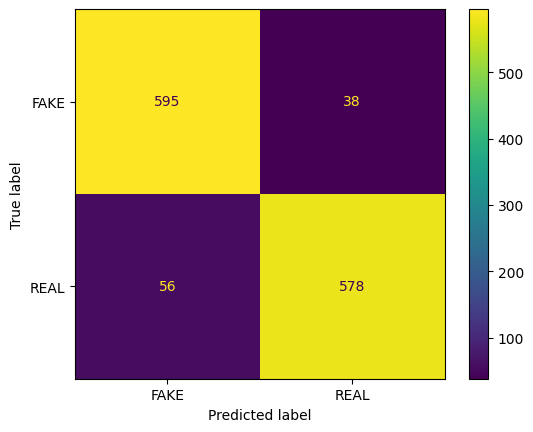

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()

In [ ]:
os.makedirs("/kaggle/working/ml_fake_news/svm", exist_ok=True)

# Save model
joblib.dump(svm_pipeline, '/kaggle/working/ml_fake_news/svm/svm.joblib')

# Random Forest

In [20]:
rf_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("rf", RandomForestClassifier(n_estimators= 118,
                                  min_samples_split= 3, 
                                  min_samples_leaf= 1, 
                                  max_features= 'sqrt'))
])

rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rf',
                 RandomForestClassifier(min_samples_split=3,
                                        n_estimators=118))])

In [21]:
y_pred = rf_pipeline.predict(x_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        FAKE       0.89      0.91      0.90       633
        REAL       0.91      0.88      0.90       634

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



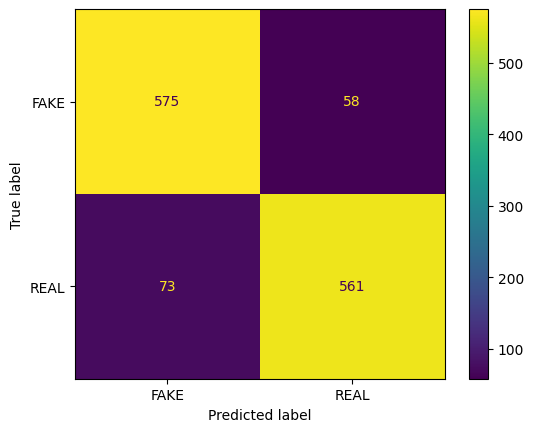

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()

In [ ]:
os.makedirs("/kaggle/working/ml_fake_news/rf", exist_ok=True)

# Save model
joblib.dump(rf_pipeline, '/kaggle/working/ml_fake_news/rf/rf.joblib')

# Regresión Logistica

In [23]:
lr_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("lr", LogisticRegression(C= 0.11560388730547369, 
                              penalty= 'none', 
                              solver= 'saga', 
                              max_iter= 617))
])

lr_pipeline.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr',
                 LogisticRegression(C=0.11560388730547369, max_iter=617,
                                    penalty='none', solver='saga'))])

In [24]:
y_pred = lr_pipeline.predict(x_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        FAKE       0.92      0.93      0.93       633
        REAL       0.93      0.92      0.93       634

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



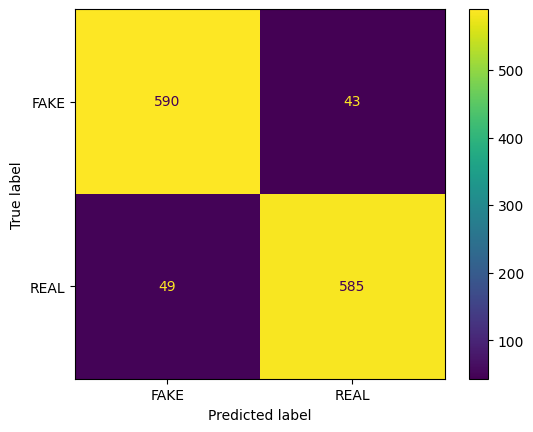

In [25]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()

In [ ]:
os.makedirs("/kaggle/working/ml_fake_news/lr", exist_ok=True)

# Save model
joblib.dump(lr_pipeline, '/kaggle/working/ml_fake_news/lr/lr.joblib')

# KNN

In [26]:
knn_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("knn", KNeighborsClassifier(n_neighbors= 4, 
                                 weights= 'distance', 
                                 algorithm= 'auto', 
                                 p= 2, 
                                 leaf_size= 48))
])
knn_pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('knn',
                 KNeighborsClassifier(leaf_size=48, n_neighbors=4,
                                      weights='distance'))])

In [27]:
y_pred = knn_pipeline.predict(x_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        FAKE       0.91      0.74      0.82       633
        REAL       0.78      0.93      0.85       634

    accuracy                           0.83      1267
   macro avg       0.84      0.83      0.83      1267
weighted avg       0.84      0.83      0.83      1267



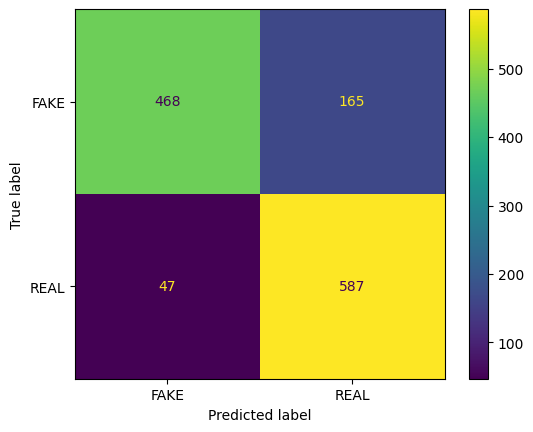

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()

In [ ]:
os.makedirs("/kaggle/working/ml_fake_news/knn", exist_ok=True)

# Save model
joblib.dump(knn_pipeline, '/kaggle/working/ml_fake_news/knn/knn.joblib')

# Naive Bayes

In [29]:
nb_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("NB", MultinomialNB(alpha= 0.019462679026782323, 
                         fit_prior= True))
])
nb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('NB', MultinomialNB(alpha=0.019462679026782323))])

In [30]:
y_pred = nb_pipeline.predict(x_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        FAKE       0.93      0.87      0.90       633
        REAL       0.88      0.94      0.91       634

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



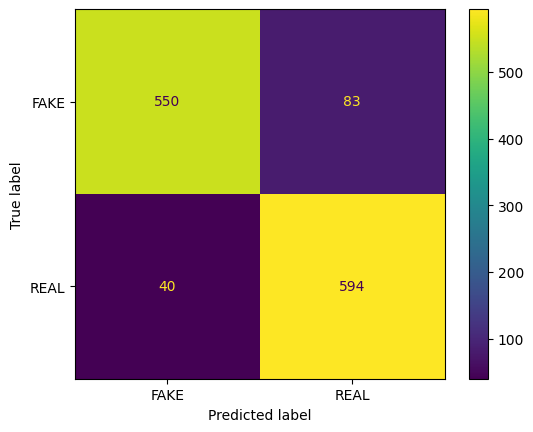

In [31]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()

In [ ]:
os.makedirs("/kaggle/working/ml_fake_news/nb", exist_ok=True)

# Save model
joblib.dump(nb_pipeline, '/kaggle/working/ml_fake_news/nb/nb.joblib')